# Differential expression

One of the main applications of metabolic RNA labeling is to identify differentially expressed genes upon some perturbation [[1]](https://www.nature.com/articles/s41586-019-1369-y). The main benefit of using metabolic RNA labeling is that short-term changes can be resolved much better as compared to standard RNA-seq, since any changes of transcription that indeed happened are masked to some extent by pre-existing RNA.

To perform differential analyses for data from [[2]](https://www.nature.com/articles/s41586-021-03689-8). These are SLAM-seq data from multiple time points (1h, 2h, 4h, 6h and 20h) after acute depletion of BANP. BANP is a transcriptional activator that binds to unmethylated CGCG motifs in CpG island promoters.

# Loading data and QC
We first load the grandPy package and then read the GRAND-SLAM output table directly from zenodo:

In [1]:
# loading the grandPy package anpassen
from GrandPy.load import *
warnings.filterwarnings("ignore", category=UserWarning)

banp = read_grand("https://zenodo.org/record/6976391/files/BANP.tsv.gz", design=("Cell", "Experimental.time", "Genotype", "dur.4sU", "has.4sU", "Replicate"))

Detected URL -> downloading to temp file
Detected dense format -> using dense reader
Temporary file BANP.tsv.gz was deleted after loading.


C:\Users\User\PycharmProjects\grandpy\Py\utils.py:140: UserWarning: 34 Duplicate gene symbols found: Gm16701, Sept2, Gm2464, Jakmip1, Dancr (first 5); they have been renamed to ensure uniqueness (e.g., MATR3 → MATR3_1).
  warnings.warn(f"{len(duplicates_list)} Duplicate gene symbols found: {', '.join(duplicates_list[:5])} (first 5); they have been renamed to ensure uniqueness (e.g., MATR3 → MATR3_1).")
C:\Users\User\PycharmProjects\grandpy\Py\grandPy.py:128: UserWarning: No 'Condition' entry in coldata, assuming all samples/cells as 'Control'! Consider changing it (see GrandPy.with_condition()) or renaming an existing column if it should already exist. (see GrandPy.with_coldata())
  warnings.warn("No 'Condition' entry in coldata, assuming all samples/cells as 'Control'! "


Refer to the [Loading data and working with grandPy objects](vignette_03_loading_data_and_working_with_grandPy_objects.ipynb) vignette to learn more about how to load data. Note that sample metadata has been automatically extracted from the sample names via the design parameter given to `read_grand`:

In [2]:
banp.coldata

,Name,Cell,Experimental.time,Experimental.time.original,Genotype,duration.4sU,duration.4sU.original,has.4sU,Replicate,no4sU,Condition
Name,,,,,,,,,,,
mESC.0h.wt.0h.no4sU.A,mESC.0h.wt.0h.no4sU.A,mESC,0.0,0h,wt,0.0,0h,no4sU,A,True,Control
mESC.0h.wt.0h.no4sU.B,mESC.0h.wt.0h.no4sU.B,mESC,0.0,0h,wt,0.0,0h,no4sU,B,True,Control
mESC.0h.wt.0h.no4sU.C,mESC.0h.wt.0h.no4sU.C,mESC,0.0,0h,wt,0.0,0h,no4sU,C,True,Control
mESC.0h.wt.2h.4sU.A,mESC.0h.wt.2h.4sU.A,mESC,0.0,0h,wt,2.0,2h,4sU,A,False,Control
mESC.0h.wt.2h.4sU.B,mESC.0h.wt.2h.4sU.B,mESC,0.0,0h,wt,2.0,2h,4sU,B,False,Control
mESC.0h.wt.2h.4sU.C,mESC.0h.wt.2h.4sU.C,mESC,0.0,0h,wt,2.0,2h,4sU,C,False,Control
mESC.0h.dTag.2h.4sU.A,mESC.0h.dTag.2h.4sU.A,mESC,0.0,0h,dTag,2.0,2h,4sU,A,False,Control
mESC.0h.dTag.2h.4sU.B,mESC.0h.dTag.2h.4sU.B,mESC,0.0,0h,dTag,2.0,2h,4sU,B,False,Control
mESC.1h.dTag.30min.4sU.A,mESC.1h.dTag.30min.4sU.A,mESC,1.0,1h,dTag,0.5,30min,4sU,A,False,Control


The experimental time column indicates the period of time the sample was treated with the dTAG13 compound that induces acute depletion of BANP within 30 minutes.

By default GRAND-SLAM will report data on all genes (with at least one mapped read), and `read_grand` will read all these genes from the output:

In [3]:
print(banp)

GrandPy:
Read from BANP.tsv
24616 genes, 23 samples/cells
Available data slots: ['ntr', 'alpha', 'beta', 'count']
Available analyses: []
Available plots: {}
Default data slot: count



Thus, we filter to only include genes that have at least 100 reads in at least 11 samples:

In [4]:
banp = banp.filter_genes(min_expression=100, min_columns=11)
print(banp)

GrandPy:
Read from BANP.tsv
11147 genes, 23 samples/cells
Available data slots: ['ntr', 'alpha', 'beta', 'count']
Available analyses: []
Available plots: {}
Default data slot: count



The actual data is available in so-called "data slots". `read_grand` adds the read counts, new to toal RNA ratios (NTRs) and information on the NTR posterior distribution (alpha, beta).

As a quick quality check, we can inspect a principal component analysis of all samples involved:

Fitting size factors...
... done in 0.01 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 1.13 seconds.

Fitting dispersion trend curve...
... done in 0.17 seconds.

Fitting MAP dispersions...
... done in 1.41 seconds.

Fitting LFCs...
... done in 0.68 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 11 outlier genes.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting LFCs...
... done in 0.01 seconds.

Fitting dispersions...
... done in 1.10 seconds.



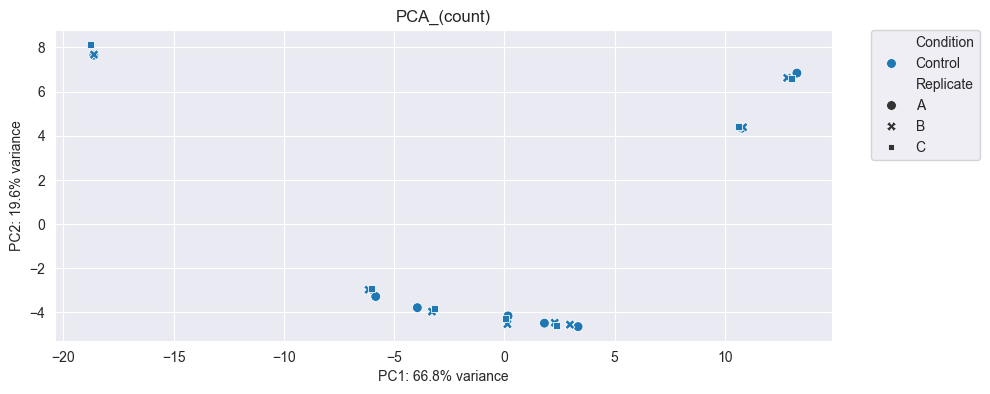

In [5]:
from GrandPy.plot import *
plot_pca(banp)

By default, the samples are colored according to the `condition annotation`. `Condition` has a special meaning in grandPy, not only for `PlotPCA`, but also for other analyses (see below). We do not have a condition set (see the Coldata table above, there is no column named `Condition`). There are two ways how the condition can be set:

1. Use the keyword "Condition" in the design parameter to `read_grand`. Use this, if you have a useful condition as part of your sample names.
2. Call the `Condition` function.

Here a useful condition is to combine the genotype, timepoint and 4sU status. We can set this like this (for more information, see the [Loading data vignette](vignette_03_loading_data_and_working_with_grandPy_objects.ipynb)):

In [6]:
banp = banp.with_condition(["Genotype", "Experimental.time.original", "has.4sU"])
banp.coldata

,Name,Cell,Experimental.time,Experimental.time.original,Genotype,duration.4sU,duration.4sU.original,has.4sU,Replicate,no4sU,Condition
Name,,,,,,,,,,,
mESC.0h.wt.0h.no4sU.A,mESC.0h.wt.0h.no4sU.A,mESC,0.0,0h,wt,0.0,0h,no4sU,A,True,wt 0h no4sU
mESC.0h.wt.0h.no4sU.B,mESC.0h.wt.0h.no4sU.B,mESC,0.0,0h,wt,0.0,0h,no4sU,B,True,wt 0h no4sU
mESC.0h.wt.0h.no4sU.C,mESC.0h.wt.0h.no4sU.C,mESC,0.0,0h,wt,0.0,0h,no4sU,C,True,wt 0h no4sU
mESC.0h.wt.2h.4sU.A,mESC.0h.wt.2h.4sU.A,mESC,0.0,0h,wt,2.0,2h,4sU,A,False,wt 0h 4sU
mESC.0h.wt.2h.4sU.B,mESC.0h.wt.2h.4sU.B,mESC,0.0,0h,wt,2.0,2h,4sU,B,False,wt 0h 4sU
mESC.0h.wt.2h.4sU.C,mESC.0h.wt.2h.4sU.C,mESC,0.0,0h,wt,2.0,2h,4sU,C,False,wt 0h 4sU
mESC.0h.dTag.2h.4sU.A,mESC.0h.dTag.2h.4sU.A,mESC,0.0,0h,dTag,2.0,2h,4sU,A,False,dTag 0h 4sU
mESC.0h.dTag.2h.4sU.B,mESC.0h.dTag.2h.4sU.B,mESC,0.0,0h,dTag,2.0,2h,4sU,B,False,dTag 0h 4sU
mESC.1h.dTag.30min.4sU.A,mESC.1h.dTag.30min.4sU.A,mESC,1.0,1h,dTag,0.5,30min,4sU,A,False,dTag 1h 4sU


Fitting size factors...
... done in 0.01 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 1.22 seconds.

Fitting dispersion trend curve...
... done in 0.18 seconds.

Fitting MAP dispersions...
... done in 1.22 seconds.

Fitting LFCs...
... done in 0.63 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Fitting dispersions...
... done in 1.13 seconds.



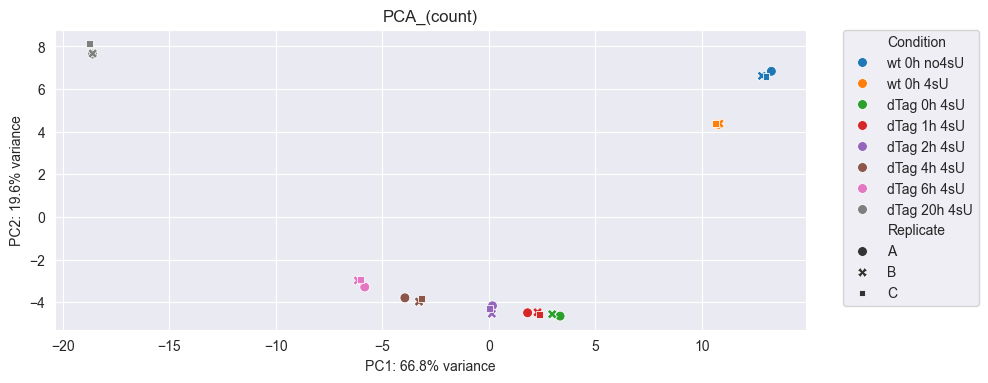

In [7]:
plot_pca(banp)

We see that (i) 4sU treatment had an effect on total RNA levels (there is a clear difference between no4sU and 4sU for wt), and that (ii) inserting the degron tag also had an effect (there is a clear difference between wt) and dTag.0h, the latter is a sample treated with 4sU for 2h, but was not treated with dTAG13).

<span style="color:red">Before we can investigate these effects, we need to learn how to perform pairwise differential expression analysis in grandPy. Such pairwise analyses are based on so-calles "contrast matrices", which can conveniently be constructed by using the `get_contrasts` function:

In [8]:
# R-code:
# GetContrasts(banp)